In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector

In [2]:
import os 
os.chdir(r"C:\Training\Academy\Statistics (Python)\Cases\human-resources-analytics")

hr = pd.read_csv("HR_comma_sep.csv")
X = hr.drop('left', axis=1)
y = hr['left']

In [3]:
ohe = OneHotEncoder(handle_unknown='ignore')
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude=object)  ),
                             (ohe, make_column_selector(dtype_include=object) ),
                            verbose_feature_names_out=False)
dtc = DecisionTreeClassifier(random_state=24)
pipe = Pipeline([('CT',ct),('DT',dtc)])

In [4]:
params = {'DT__min_samples_split':[2, 10, 25, 50],
          'DT__min_samples_leaf':[1, 10, 25, 50],
          'DT__max_depth':[None, 4, 6]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='roc_auc', verbose=3)
gcv.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.976 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.972 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.972 total time=   0.0s
[CV 4/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.978 total time=   0.0s
[CV 5/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=2;, score=0.976 total time=   0.0s
[CV 1/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.984 total time=   0.0s
[CV 2/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.979 total time=   0.0s
[CV 3/5] END DT__max_depth=None, DT__min_samples_leaf=1, DT__min_samples_split=10;, score=0.979 total time=   0.0s
[CV 4/5] END DT__max_de

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FC3B7D87D0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FC3B8DC2C0>)],
                                                          verbose_feature_names_out=False)),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=24))]),
             param_grid={'DT__max_depth': [None, 4, 6],
                         'DT__min_samples_leaf': [1, 10, 25, 50],
                         'DT__min_samples_split': [2, 10, 25, 50]},
             scoring='roc_auc', verbose=3)

In [5]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DT__max_depth': None, 'DT__min_samples_leaf': 10, 'DT__min_samples_split': 2}
0.9859959505714124


In [6]:
best_model = gcv.best_estimator_
best_model.named_steps['DT'].feature_importances_

array([5.20970813e-01, 1.45602793e-01, 1.06079455e-01, 7.34661254e-02,
       1.48698815e-01, 2.85011419e-04, 3.65999798e-05, 0.00000000e+00,
       8.83493499e-05, 1.10257499e-04, 1.74835740e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.97893379e-04, 1.22494686e-04,
       8.05381965e-04, 3.96940288e-04, 1.56552021e-03, 5.98715372e-04])

In [7]:
best_model.named_steps['CT'].get_feature_names_out()

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_support', 'Department_technical',
       'salary_high', 'salary_low', 'salary_medium'], dtype=object)

### Best Tree

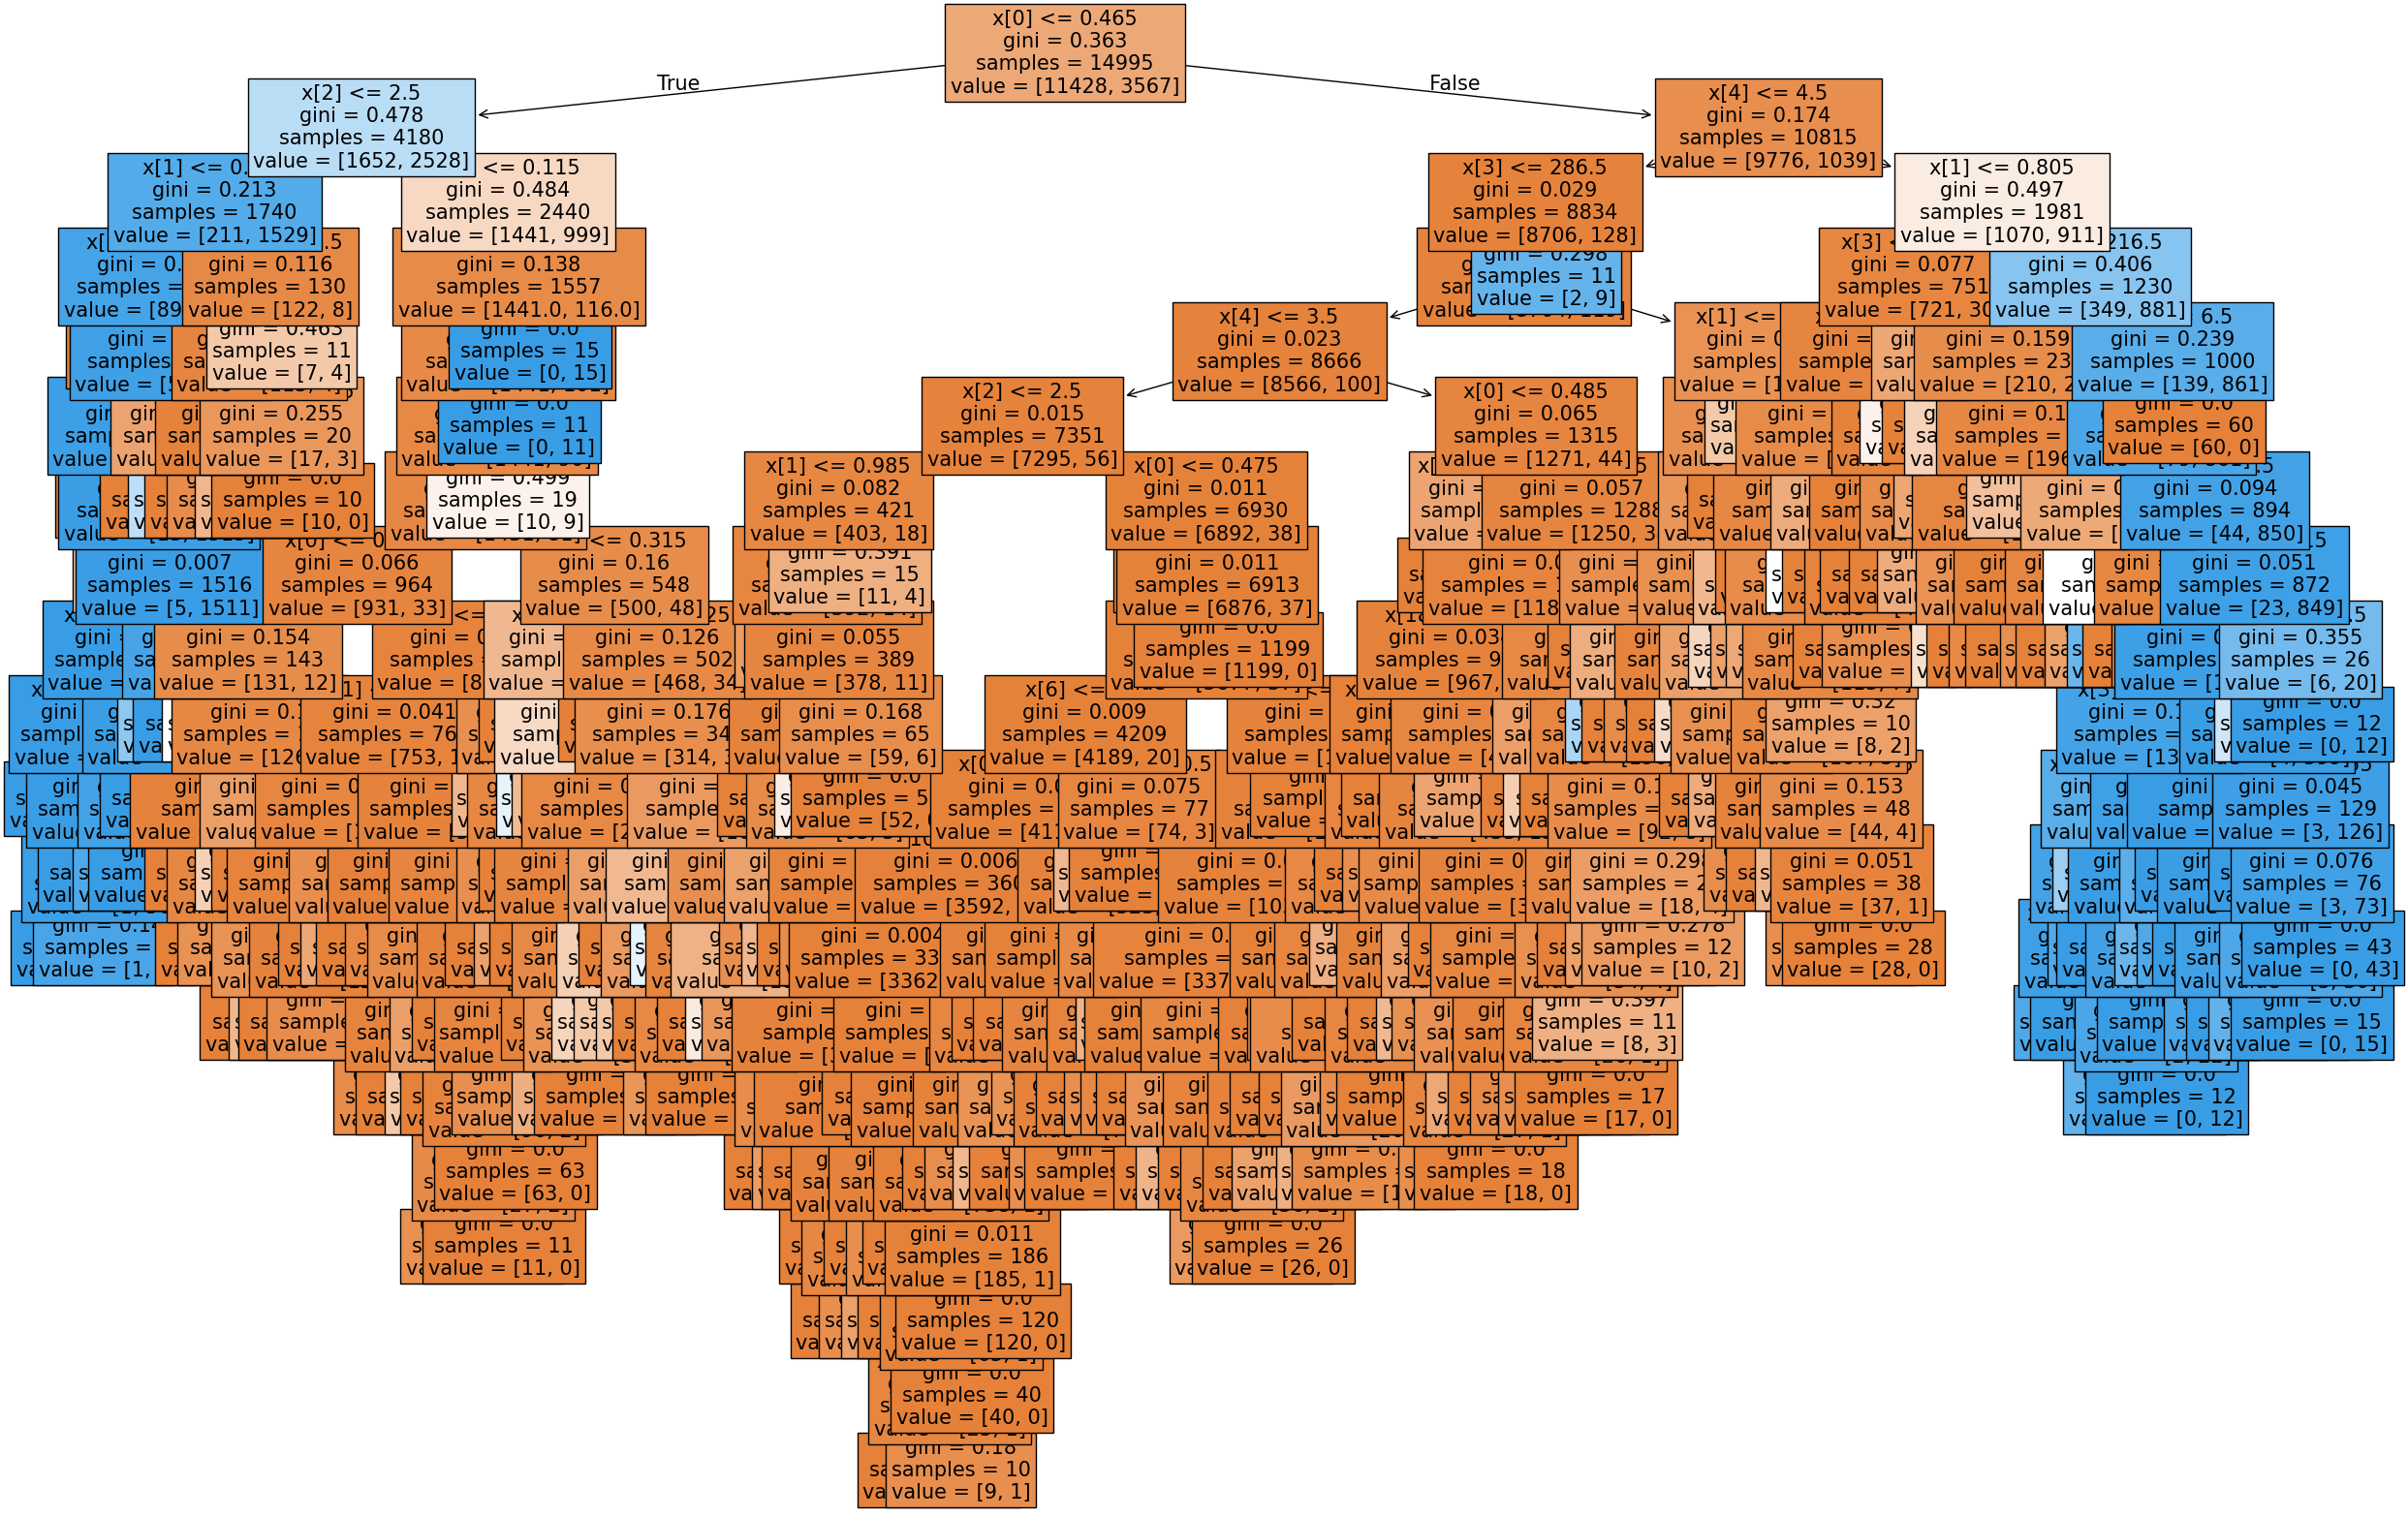

In [9]:
best_tree = gcv.best_estimator_.named_steps['DT'] 
plt.figure(figsize=(30,20))
plot_tree(best_tree, filled=True,fontsize=15)
plt.show() 

In [10]:
best_tree.feature_importances_

array([5.20970813e-01, 1.45602793e-01, 1.06079455e-01, 7.34661254e-02,
       1.48698815e-01, 2.85011419e-04, 3.65999798e-05, 0.00000000e+00,
       8.83493499e-05, 1.10257499e-04, 1.74835740e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.97893379e-04, 1.22494686e-04,
       8.05381965e-04, 3.96940288e-04, 1.56552021e-03, 5.98715372e-04])

In [11]:
gcv.best_estimator_.named_steps['CT'].get_feature_names_out()

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_support', 'Department_technical',
       'salary_high', 'salary_low', 'salary_medium'], dtype=object)

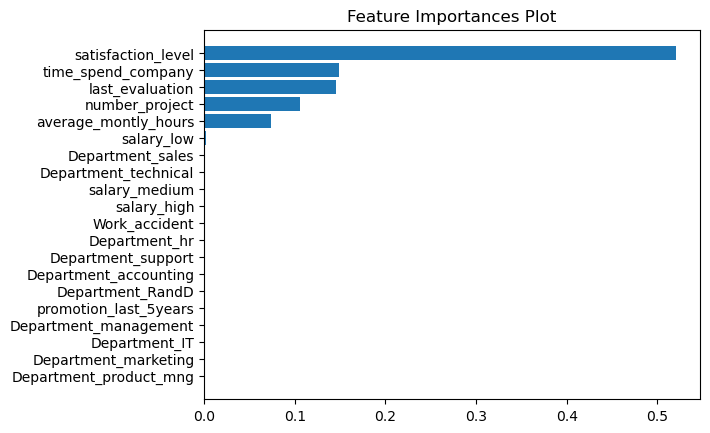

In [12]:
df_imp = pd.DataFrame({'feature':list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
              'importance':best_tree.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()

## Satellite Imaging

In [14]:
os.chdir(r"C:\Training\Academy\Statistics (Python)\Cases\Satellite Imaging")
satellite = pd.read_csv("Satellite.csv", sep=";")
y = satellite['classes']
X = satellite.drop('classes', axis=1)

In [15]:
dtc = DecisionTreeClassifier(random_state=24)
params = {'min_samples_split':[2, 10, 25, 50],
          'min_samples_leaf':[1, 10, 25, 50],
          'max_depth':[None, 4, 6]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss', verbose=3)
gcv.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.349 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-4.817 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.573 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.265 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-5.293 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.915 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-3.512 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.375 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=-4.050 total time=   0.0s
[CV 5/5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]},
             scoring='neg_log_loss', verbose=3)

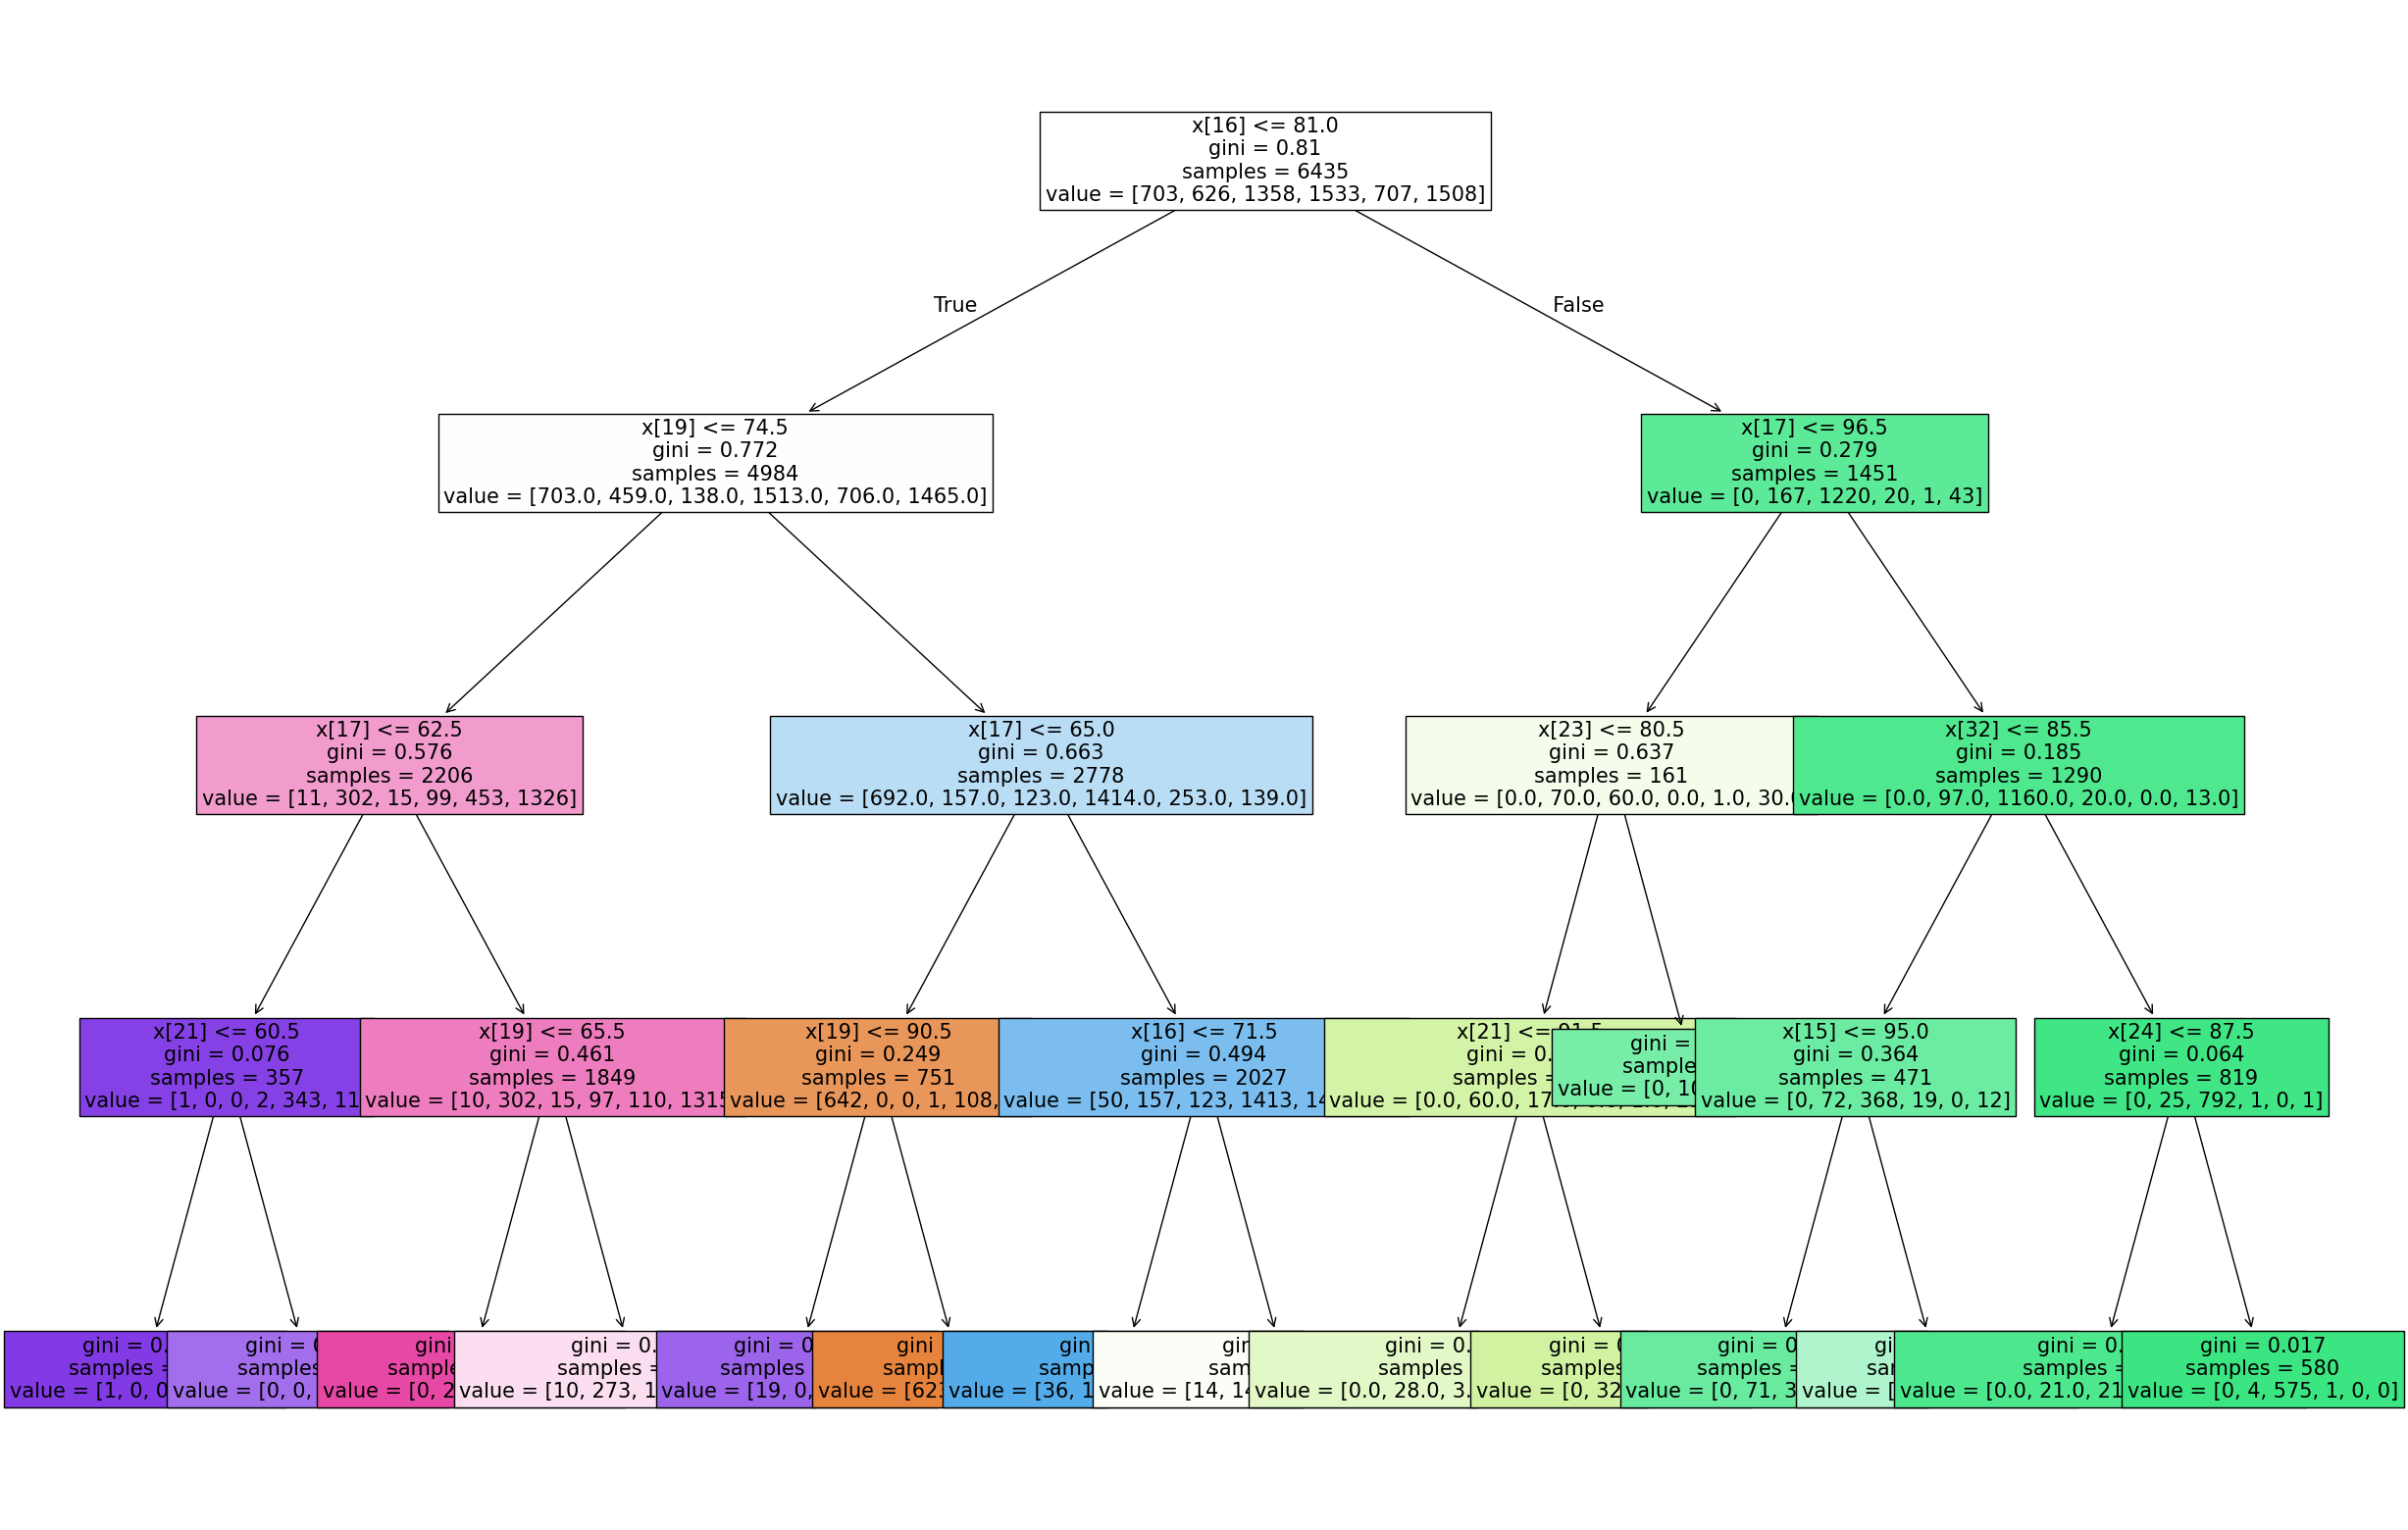

In [16]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(30,20))
plot_tree(best_tree, filled=True,fontsize=15)
plt.show() 

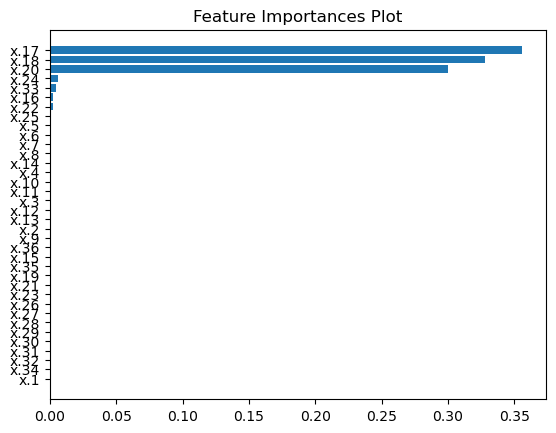

In [17]:
df_imp = pd.DataFrame({'feature':list(X.columns),
              'importance':best_tree.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()